<a href="https://colab.research.google.com/github/esther119/Learning/blob/master/COVID_cultural_persuasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import networkx as nx
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import random


class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4,empathy=1, weight=0.5):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.empathy = empathy

        self.weight = weight

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, self.weight)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self, show_colorbar=False):
        '''
        Draw the state of the network.
        '''
        plt.clf()
        # Draw network
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        if show_colorbar:
            # Make colorbar
            cmap = plt.get_cmap('viridis', 10)
            norm = mpl.colors.Normalize(vmin=0, vmax=1)
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='opinion')
        # Make title
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = min((
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]) #opinion shouldn't be greater than 1 
                + self.empathy * weight * 0.1),1)
                #alpha update opinions to fit into others 

    

            self.graph.edges[edge]['weight'] = (
                weight +
                # self.beta * weight * (1-weight))
                
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1]))) 
            #beta is about the strength of connection
            #gamma wants to decrease the connection if opinions are different 

            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

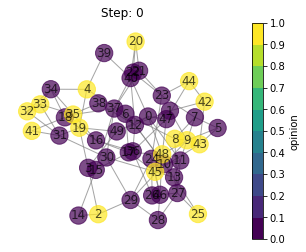

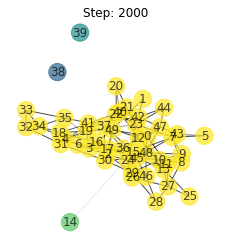

In [99]:
sim = SocialDynamicsSimulation(alpha=0.001, beta=0.3, gamma=4, empathy = 1)
sim.initialize()
plt.figure(figsize=(4, 3))
sim.observe(show_colorbar=True)
plt.show()
for i in range(10):
    for i in range(200):
        sim.update()
plt.figure(figsize=(3, 3))
sim.observe()
plt.show()

In [36]:
opinion = 5



0
1
